<a href="https://colab.research.google.com/github/Sebukpor/heart-diseases-prediction/blob/main/Heart_diseases__classification_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [5]:
# Load the dataset
data = pd.read_csv("/content/Train Dataset .csv")

# Check for and handle missing values in labels
#data.dropna(subset=['diabetes'], inplace=True)

In [6]:
data.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [7]:
data.tail()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
7298,19401,30,1,2,107,177,1,2,119,0,2.7,1,0,0,0
7299,10446,42,1,2,96,551,1,2,76,0,1.9,2,3,2,1
7300,13219,51,1,0,151,165,1,0,190,1,0.9,0,0,2,1
7301,15349,29,0,0,195,287,1,2,161,1,3.4,1,1,0,1
7302,15363,38,0,0,193,487,0,1,154,1,4.8,1,4,3,1


In [20]:
# Separate features and labels
X = data.drop(['target', 'Id'], axis=1)
Y = data['target']

In [21]:
print(X)

      Age  Sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      33    0   1       158   205    1        0      154      0      1.5   
1      53    1   2       198   154    0        1      104      0      0.8   
2      37    1   2       101   202    1        0      155      0      2.1   
3      75    0   0       113   306    1        2       88      1      4.9   
4      35    1   2       139   419    1        1      166      1      0.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
7298   30    1   2       107   177    1        2      119      0      2.7   
7299   42    1   2        96   551    1        2       76      0      1.9   
7300   51    1   0       151   165    1        0      190      1      0.9   
7301   29    0   0       195   287    1        2      161      1      3.4   
7302   38    0   0       193   487    0        1      154      1      4.8   

      slope  ca  thal  
0         1   4     1  
1         2   1     0  
2  

In [22]:
print(Y)

0       1
1       0
2       1
3       1
4       1
       ..
7298    0
7299    1
7300    1
7301    1
7302    1
Name: target, Length: 7303, dtype: int64


In [23]:
data['target'].value_counts()

,count
target,
1,5941
0,1362


In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
print(X_scaled)

[[-1.42211281 -0.99931558 -0.45049331 ...  0.01038828  1.40449313
  -0.45124175]
 [-0.01217263  1.00068488  0.44595155 ...  1.23402692 -0.72248827
  -1.34966555]
 [-1.14012478  1.00068488  0.44595155 ...  0.01038828  0.69549933
  -0.45124175]
 ...
 [-0.15316665  1.00068488 -1.34693818 ... -1.21325037 -1.43148208
   0.44718205]
 [-1.70410085 -0.99931558 -1.34693818 ...  0.01038828 -0.72248827
  -1.34966555]
 [-1.06962777 -0.99931558 -1.34693818 ...  0.01038828  1.40449313
   1.34560585]]


# Exculded for now

In [349]:
# Check the shapes of X_scaled and Y to ensure they match
print(f"X_scaled shape: {X_scaled.shape}")
print(f"Y shape: {Y.shape}")

# Ensure data cardinality matches
assert X_scaled.shape[0] == Y.shape[0], "Mismatch in number of samples between X and Y"

X_scaled shape: (7303, 13)
Y shape: (7303,)


In [370]:
mean_values = scaler.mean_
scale_values = scaler.scale_

print("Mean Values:", mean_values)
print("Scale Values:", scale_values)

Mean Values: [ 53.06451613   0.48869114   1.504264   146.38487208 344.02780868
   0.49721913   1.02113459 135.99332592   0.48461253   3.14271413
   1.01149425   2.03225806   1.47348906]
Scale Values: [ 14.34831771   0.49987209   1.11254034  30.63489897 127.24144164
   0.49999227   0.81143919  38.41278967   0.49976317   1.80966787
   0.81482457   1.39709343   1.1205358 ]


# 0---> Non-diabetic

# 1---> diabetic


In [402]:
import tensorflow as tf
from sklearn.utils import resample
from tensorflow.keras.callbacks import ReduceLROnPlateau
import numpy as np

# Option 1: Down-sampling majority class or Up-sampling minority class
def balance_data(X, y):
    # Separate majority and minority classes
    X_majority = X[y == 1]
    X_minority = X[y == 0]

    # Down-sample majority class
    X_majority_downsampled, y_majority_downsampled = resample(
        X_majority, np.ones(len(X_majority)),
        replace=False,  # no replacement
        n_samples=len(X_minority),  # match minority class size
        random_state=42
    )

    # Combine minority class and downsampled majority class
    X_balanced = np.vstack((X_majority_downsampled, X_minority))
    y_balanced = np.hstack((y_majority_downsampled, y[y == 0]))

    return X_balanced, y_balanced

# Balance the dataset
X_balanced, y_balanced = balance_data(X_scaled, Y)

# Option 2: Use Class Weights to adjust for imbalanced classes
class_weight = {0: len(Y) / (2 * np.bincount(Y)[0]),
                1: len(Y) / (2 * np.bincount(Y)[1])}

# Define the neural network model with regularization and dropout
model = tf.keras.Sequential(name="my_neural_network_model")
model.add(tf.keras.layers.InputLayer(shape=(X_scaled.shape[1],)))  # Explicit InputLayer

# Adding Dense layers with L2 regularization
model.add(tf.keras.layers.Dense(units=16, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.Dense(units=32, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.Dense(units=64, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.Dense(units=128, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.Dense(units=256, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=516, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model.add(tf.keras.layers.Dense(units=1024, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.0)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=2048, activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01)))

# Adding Dropout to prevent overfitting
model.add(tf.keras.layers.Dropout(0.3))

# Output layer with sigmoid activation for binary classification
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model with Adam optimizer and binary crossentropy loss
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Learning rate reduction if validation accuracy plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-2)

# Split the data into train and validation sets (assuming you have X_train, X_val, Y_train, Y_val)
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_balanced, y_balanced, test_size=0.1, random_state=42)

In [404]:
# Train the model
history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=27,
                    batch_size=32,
                    class_weight=class_weight,  # Option for class balancing
                    callbacks=[reduce_lr]
                    )


Epoch 1/27
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.8787 - loss: 0.3668 - val_accuracy: 0.8828 - val_loss: 0.4542 - learning_rate: 0.0010
Epoch 2/27
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.8787 - loss: 0.3651 - val_accuracy: 0.8828 - val_loss: 0.4626 - learning_rate: 0.0010
Epoch 3/27
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.8867 - loss: 0.3530 - val_accuracy: 0.8828 - val_loss: 0.4371 - learning_rate: 0.0010
Epoch 4/27
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.8757 - loss: 0.3609 - val_accuracy: 0.8828 - val_loss: 0.4400 - learning_rate: 0.0010
Epoch 5/27
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.8837 - loss: 0.3492 - val_accuracy: 0.8828 - val_loss: 0.4440 - learning_rate: 0.0010
Epoch 6/27
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.8847 - loss: 0.3459 - val_accuracy: 0.8828 - val_loss: 0.4312 - learning_rate: 0.0010
Epoch 7/27
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.8857 - loss: 0.3437 - val_

In [405]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_val, Y_val, verbose=2)

# Print the evaluation metrics
print("Test accuracy:", accuracy)
print("Test loss:", loss)

9/9 - 0s - 12ms/step - accuracy: 0.8828 - loss: 0.4243
Test accuracy: 0.8827838897705078
Test loss: 0.42430493235588074


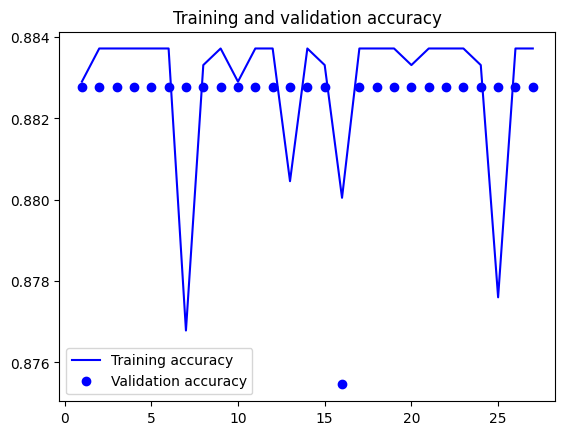

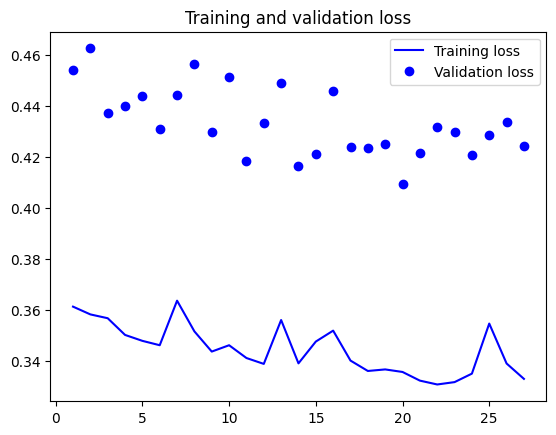

In [406]:
# Plot the training and validation accuracy and loss at each epoch
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'bo', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [407]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

# Predict on the test data (probabilities)
Y_pred_prob = model.predict(X_val)

# Convert probabilities to binary outcomes (0 or 1) using a threshold of 0.5
Y_pred = (Y_pred_prob > 0.5).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(Y_val, Y_pred)
recall = recall_score(Y_val, Y_pred)
f1 = f1_score(Y_val, Y_pred)

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_val, Y_pred)

# Output the calculated metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Precision: 1.0
Recall: 0.7730496453900709
F1 Score: 0.872
Confusion Matrix:
 [[132   0]
 [ 32 109]]


In [384]:
# Load test data
test_df = pd.read_csv('/content/Test Dataset.csv')

In [385]:
test_df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [400]:
test_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
2692,34,0,3,136,291,0,1,163,0,2.6,2,2,3
2693,72,0,1,104,166,1,2,95,1,0.3,0,2,2
2694,31,1,0,153,457,1,1,170,1,3.8,0,3,1
2695,71,0,0,111,242,1,0,147,1,5.3,0,1,2
2696,51,1,3,133,481,0,0,91,0,1.4,2,2,3


In [386]:
# Store IDs separately
test_ids = test_df['id']

In [387]:
# Drop ID column
test_df = test_df.drop('id', axis=1)

In [388]:
# Scale/transform test data
X_test_scaled = scaler.fit_transform(test_df)

In [389]:
print(X_test_scaled)

[[ 1.18031146  1.02287939 -1.35209839 ... -0.01410641 -1.4546329
  -0.42255594]
 [ 0.55306023  1.02287939 -1.35209839 ...  1.21315163 -0.02308941
   0.46987427]
 [-0.00449642  1.02287939 -1.35209839 ... -0.01410641 -0.73886115
  -1.31498616]
 ...
 [-1.53777722  1.02287939 -1.35209839 ... -1.24136446  0.69268233
  -0.42255594]
 [ 1.25000605 -0.97763237 -1.35209839 ... -1.24136446 -0.73886115
   0.46987427]
 [-0.14388559  1.02287939  1.34443305 ...  1.21315163 -0.02308941
   1.36230448]]


In [390]:
#Prediction

Y_pred_prob = model.predict(X_test_scaled)
Y_pred = (Y_pred_prob > 0.5).astype(int)

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [393]:
# Ensure Y_pred is flattened (1D array)
Y_pred = Y_pred.flatten()

# Create Submission DataFrame
submission_df = pd.DataFrame({
    'ID': test_ids,
    'Target': Y_pred
})


In [394]:
#Save Submission DataFrame

submission_df.to_csv('submission.csv', index=False)

In [397]:
sub = pd.read_csv('/content/submission.csv')

In [398]:
sub.head()

,ID,Target
0,16501,1
1,10444,1
2,14288,1
3,10409,1
4,17330,0


In [399]:
sub.tail()

,ID,Target
2692,14964,0
2693,16774,1
2694,18884,1
2695,10000,1
2696,17660,0
